In [ ]:
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from IPython.display import display
import matplotlib.pyplot as plt

# Initialize a global simulator
simulator = AerSimulator(seed_simulator=42)
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00


# Task 1: Hadamard on Both Qubits

In [ ]:
print("=== Task 1: Hadamard on Both ===")
# Create circuit
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])

# Simulate
compiled = transpile(qc1, simulator)
job = simulator.run(compiled, shots=1024)
counts1 = job.result().get_counts()

print("Measurement Results:", counts1)

=== Task 1: Hadamard on Both ===
Measurement Results: {'11': 231, '01': 272, '00': 243, '10': 278}


Circuit Diagram (Task 1):


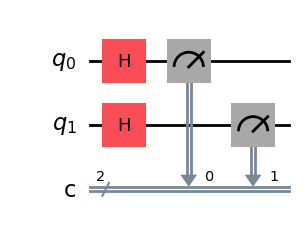

In [ ]:
print("Circuit Diagram (Task 1):")
display(qc1.draw('mpl'))

Histogram (Task 1):


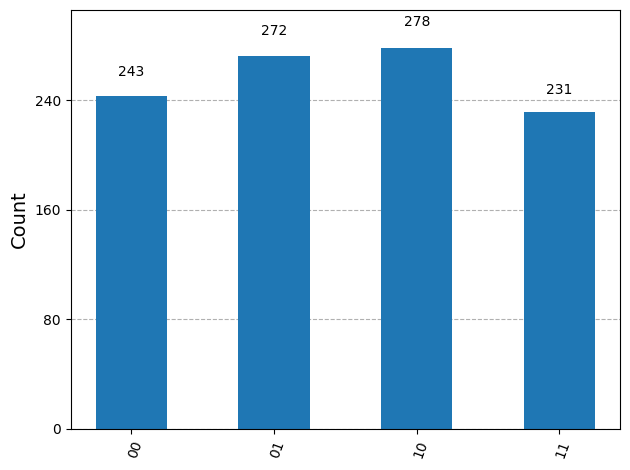

In [ ]:
print("Histogram (Task 1):")
plot_histogram(counts1)

# Task 2: Swap Qubit Roles (X on Qubit 1)

In [ ]:
print("\n=== Task 2: X on Qubit 1 ===")
qc2 = QuantumCircuit(2, 2)
qc2.x(1)  # Apply X gate on qubit 1
qc2.measure([0, 1], [0, 1])

# Simulate
compiled = transpile(qc2, simulator)
job = simulator.run(compiled, shots=1024)
counts2 = job.result().get_counts()

print("Measurement Results:", counts2)


=== Task 2: X on Qubit 1 ===
Measurement Results: {'10': 1024}


Circuit Diagram (Task 2):


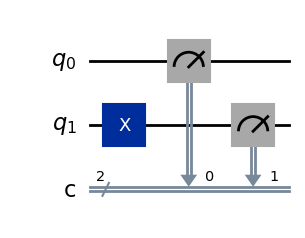

In [ ]:
print("Circuit Diagram (Task 2):")
display(qc2.draw('mpl'))

Histogram (Task 2):


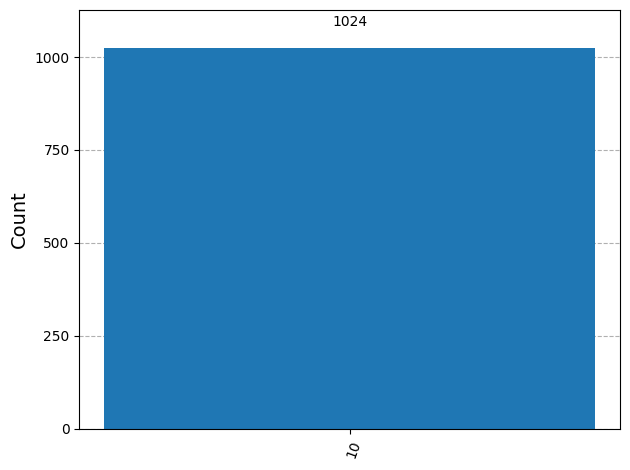

In [ ]:
print("Histogram (Task 2):")
plot_histogram(counts2)

# Task 3: Add a CNOT (Bell State)

In [ ]:
print("\n=== Task 3: CNOT (Bell State) ===")
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])

# Simulate
compiled = transpile(qc3, simulator)
job = simulator.run(compiled, shots=1024)
counts3 = job.result().get_counts()

print("Measurement Results:", counts3)


=== Task 3: CNOT (Bell State) ===
Measurement Results: {'11': 503, '00': 521}


Circuit Diagram (Task 3):


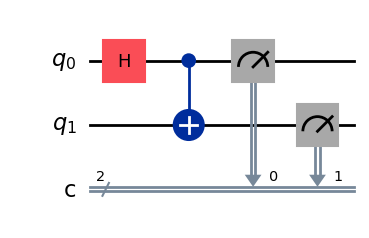

In [ ]:
print("Circuit Diagram (Task 3):")
display(qc3.draw('mpl'))

Histogram (Task 3):


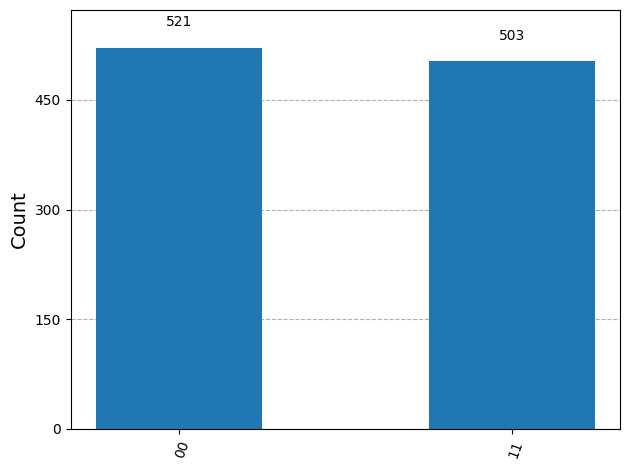

In [ ]:
print("Histogram (Task 3):")
plot_histogram(counts3)

# Task 4: Increase Measurement Shots

In [ ]:
print("\n=== Task 4: Increase Shots ===")
qc4 = QuantumCircuit(2, 2)
qc4.h(0)
qc4.h(1)
qc4.measure([0, 1], [0, 1])

# Simulate with more shots
compiled = transpile(qc4, simulator)
job = simulator.run(compiled, shots=4096)  # More shots
counts4 = job.result().get_counts()

print("Measurement Results (4096 shots):", counts4)


=== Task 4: Increase Shots ===
Measurement Results (4096 shots): {'11': 1018, '00': 973, '10': 1036, '01': 1069}


Circuit Diagram (Task 4):


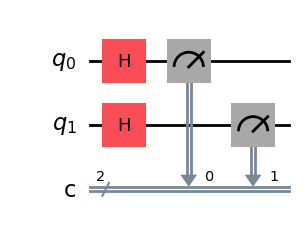

In [ ]:
print("Circuit Diagram (Task 4):")
display(qc4.draw('mpl'))

Histogram (Task 4):


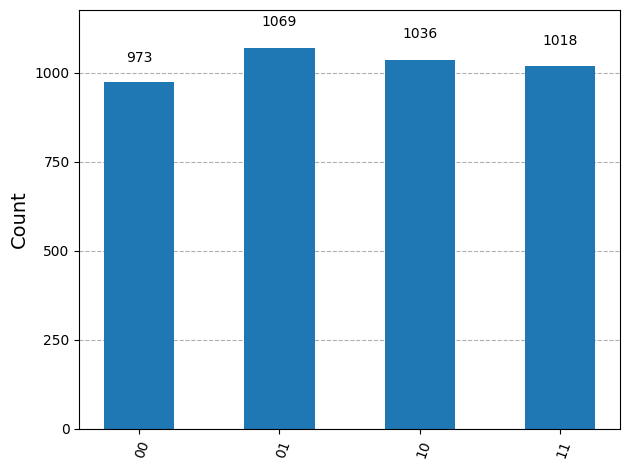

In [ ]:
print("Histogram (Task 4):")
plot_histogram(counts4)

# Task 5: Add Bloch Sphere Visualization

In [25]:
# === Cell 14: Get "Before" State (Superposition) ===

print("\n=== Task 5: Bloch Sphere (BEFORE Measurement) ===")
qc5 = QuantumCircuit(2) # No classical bits needed
qc5.h(0)
qc5.h(1)

# This is the crucial fix:
# Explicitly tell the simulator to save the final state
qc5.save_statevector()

# Run the simulation
compiled = transpile(qc5, simulator)
result = simulator.run(compiled).result()
state_before = result.get_statevector()

print("Statevector calculated for the 'before' state.")
print(state_before)


=== Task 5: Bloch Sphere (BEFORE Measurement) ===
Statevector calculated for the 'before' state.
Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


Circuit Diagram (Task 5):


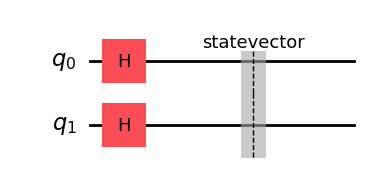

In [26]:
# === Cell 15: Draw "Before" Circuit ===

print("Circuit Diagram (Task 5):")
display(qc5.draw('mpl'))

Bloch Sphere (BEFORE Measurement):


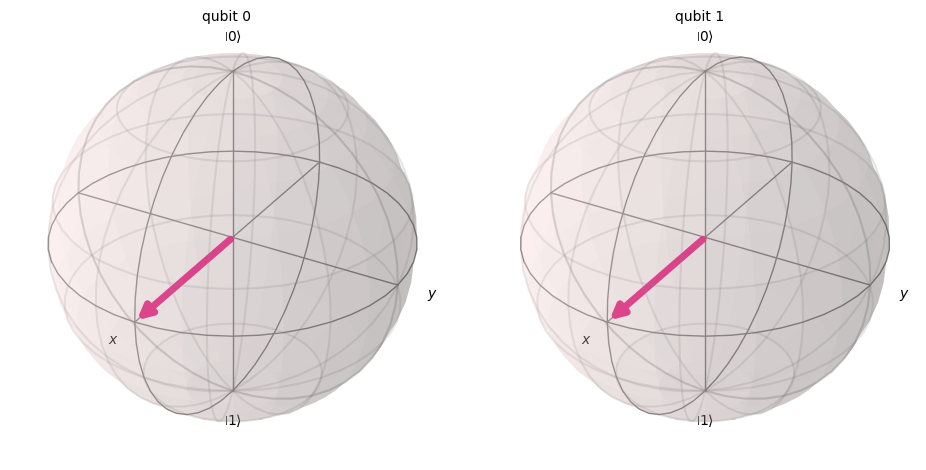

In [27]:
# === Cell 16: Plot "Before" State ===

print("Bloch Sphere (BEFORE Measurement):")
plot_bloch_multivector(state_before)

In [28]:
# === Cell 17: Get "After" State (Example: |00>) ===

print("\n--- Visualization AFTER Measurement (Example: |00>) ---")
qc_after_00 = QuantumCircuit(2)

# Get the statevector for the |00> state (the default)
state_after_00 = Statevector.from_instruction(qc_after_00)

print("Statevector for the collapsed |00> state:")
print(state_after_00)


--- Visualization AFTER Measurement (Example: |00>) ---
Statevector for the collapsed |00> state:
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


Bloch Sphere (AFTER Measurement, Collapsed to 00):


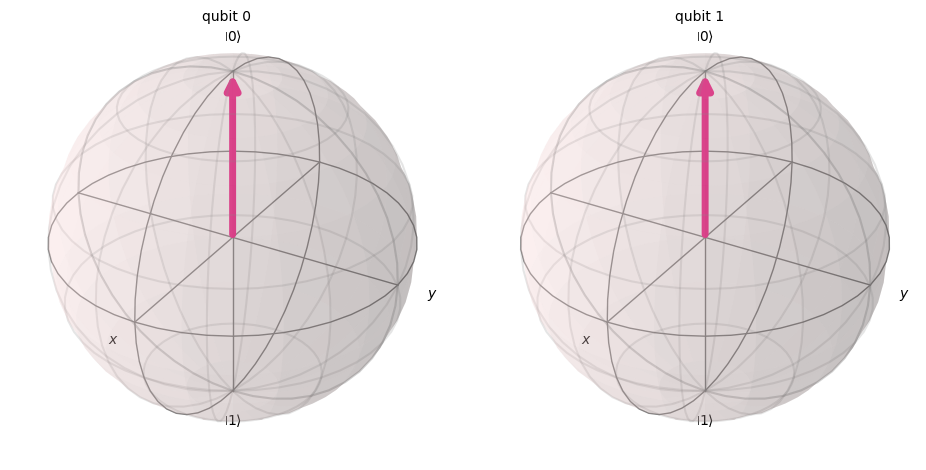

In [29]:
# === Cell 18: Plot "After" State (|00>) ===

print("Bloch Sphere (AFTER Measurement, Collapsed to 00):")
plot_bloch_multivector(state_after_00)


--- Visualization AFTER Measurement (Example: |11>) ---


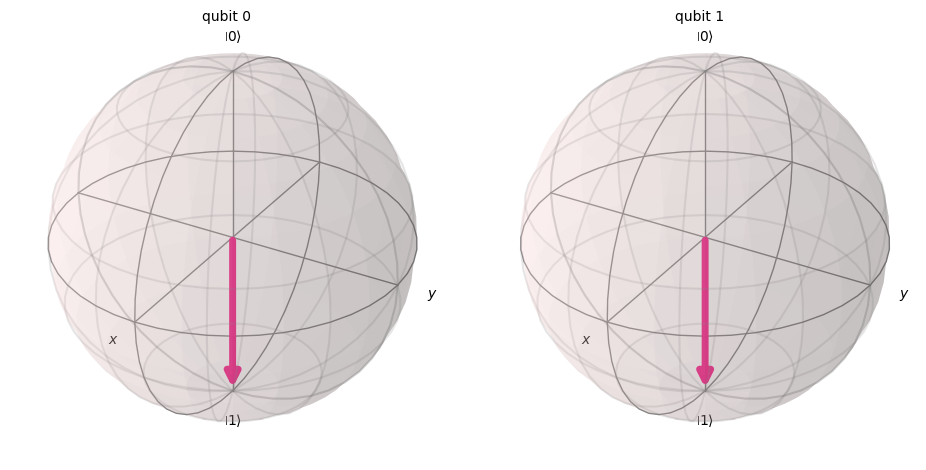

In [30]:
# === Cell 19: Plot "After" State (Example: |11>) ===

print("\n--- Visualization AFTER Measurement (Example: |11>) ---")
qc_after_11 = QuantumCircuit(2)
qc_after_11.x(0) # Flip to |1>
qc_after_11.x(1) # Flip to |1>
state_after_11 = Statevector.from_instruction(qc_after_11)

plot_bloch_multivector(state_after_11)